# Convolutional Neural Network in Keras

Computational Intelligence  - STRATEGOS  
Names (s) FR




## Assignment: Implement a CNN in Keras

We will implement

Then we will apply our CNN to MNIST dataset of handritten digits

The maximum evaluation of each Homework is 4 marks.

### CNN Fashion Mnist - Challenge CI Strategos
After submitted your Homework on the Aulaweb of the CI course
your best result to the shared table before the due date of the Homework

The winner of the challenge will receive 1 extra-mark

## Pre-requisites:

It is possible to run this notebook locally on a jupyter installation, but we recommend to run this this notebook in the cloud on Google Colab <a target="_blank" href="http://colab.research.google.com/"><img src="https://deeplearning.mit.edu/files/images/github/icon_google_colab.png" style="padding-bottom:5px;" height="18"/></a> because Colab makes possible to test the execution both on the standard CPU kernel and on a GPU powered one.

You can switch between them by selecting the following menuitems: Edit $\rightarrow$ Notebook settings $\rightarrow$ Hardware accelerator

Local execution requires to [install TensorFlow](https://www.tensorflow.org/install/), which is not always an easy task due to different version of dependent libraries, and [tf.keras](https://www.tensorflow.org/guide/keras) which
is TensorFlow's high-level API for building and training deep learning models.

You may find detailed documentation at [Keras Guide](https://www.tensorflow.org/guide/keras).

## Required imports:

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import time

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.19.0


## Download the Fashion-MNIST dataset


The MIST data set of handwritten digits
* is too easy (convolutional nets can achieve 99.7%)
* is overused.
* can not represent modern Computer Vision tasks

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) consists of 60,000 training images and 10,000 test images. It is a MNIST-like fashion product database. The developers believe MNIST has been overused so they created this as a direct replacement for that dataset. Each image is in greyscale and associated with a label from 10 classes.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.
Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Fashion-MNIST  serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

* Size: 30 MB

* Number of Records: 70,000 images in 10 classes

* Images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255.

* Labels are an array of integers, ranging from 0 to 9.

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

On https://github.com/zalandoresearch/fashion-mnist there is a list of benchmarks and the related NN architectures.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
size_x=28
size_y=28
# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], size_x, size_y, 1)
test_images = test_images.reshape(test_images.shape[0], size_x, size_y, 1)

Let's convert the image pixels into a range of 0 to 1 before feeding to the neural network model by dividing the values of both the *training set* and the *testing set* by 255.

In [ ]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(size_x, size_y, 1), (size_x, size_y)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first *count* images from the *training set* and display the class name below each image.

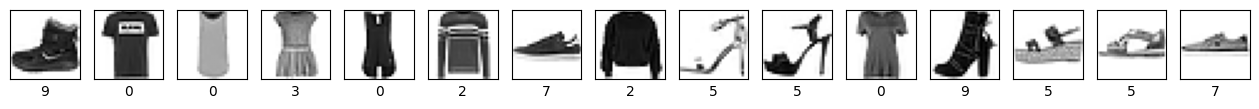

In [ ]:
count = 15
plt.figure(figsize=(16,1))
for i in range(count):
    plt.subplot(1,count,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(size_x, size_y), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Optimize the CNN model

Building the neural network requires configuring the layers of the model, then compiling the model. Here follows one possible configuration.

You should analyze the present configuration and add other building blocks to obtain your best generalization result (accuracy) on the test set.

Take inspiration from the Demos on Keras,  the documentation of [Keras](https://www.tensorflow.org/guide/keras) and on the architectures of benchmarks listed on the site of [Fashion-MNIS](https://github.com/zalandoresearch/fashion-mnist).



In [ ]:
# for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.001, mode="max",patience=10)

model = keras.Sequential()

# definition of number of batches
batchSize = 100

# the model
model.add(keras.layers.Input((size_x, size_y,1) ,batch_size= batchSize))
model.add(Conv2D(14, kernel_size=(3, 3), padding="same", activation='relu',name ="layer_1.0")) #
model.add(Conv2D(28, kernel_size=(4, 4), kernel_initializer="glorot_uniform", activation='relu',name ="layer_2.0"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), name="pooling_2.2"))


model.add(MaxPooling2D(pool_size=(2, 2), name="pooling_3.0"))
model.add(Conv2D(96, kernel_size=(4, 4), padding="same", activation='relu',name ="layer_3.0"))
model.add(keras.layers.Flatten())

model.add(tf.keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1000, kernel_initializer="random_normal", activation='relu'))

model.add(tf.keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, kernel_initializer="random_normal", activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))



# to create image of the model
create_model_image = False
if create_model_image == True:
  tf.keras.utils.plot_model(
      model,
      to_file="model.png",
      show_shapes=True,
      show_layer_names=True,
      rankdir="TB",
      expand_nested=False,
      dpi=96)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1.0 (Conv2D)              │ (100, 28, 28, 14)      │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2.0 (Conv2D)              │ (100, 25, 25, 28)      │         6,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2.2 (AveragePooling2D)  │ (100, 12, 12, 28)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3.0 (MaxPooling2D)      │ (100, 6, 6, 28)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3.0 (Conv2D)              │ (100, 6, 6, 96)        │        43,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (100, 3456)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (100, 3456)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (100, 1000)            │     3,457,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (100, 1000)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (100, 100)             │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (100, 10)              │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,607,654 (13.76 MB)

 Trainable params: 3,607,654 (13.76 MB)

 Non-trainable params: 0 (0.00 B)

None


## Model compilation

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

Those setting are relevant to improve the generalization on the test set and the learning time.
See the [Keras documentation](https://keras.io/) to select the optimal setting.

In [ ]:
#model.compile(optimizer=tf.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# new function with Adam
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


### Model training


Being in a context of *supervised learning*, training the neural network model requires to call the `model.fit` method on the training data `train_images` and the relevant ground truth `train_labels`.

To make predictions we use a test set `test_images` and check the predictions against the `test_labels` array.

In [ ]:
print(train_images.shape)
t_before = time.time()
model.fit(train_images, train_labels, validation_data=(test_images, test_labels),callbacks=[callback],epochs=50,batch_size= batchSize)
t_after = time.time()
t_training = t_after - t_before
print()
print("Training time (seconds)", t_training)

(60000, 28, 28, 1)
Epoch 1/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7230 - loss: 0.7444 - val_accuracy: 0.8704 - val_loss: 0.3469
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8751 - loss: 0.3365 - val_accuracy: 0.8947 - val_loss: 0.2837
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8952 - loss: 0.2860 - val_accuracy: 0.9015 - val_loss: 0.2684
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9046 - loss: 0.2557 - val_accuracy: 0.9104 - val_loss: 0.2426
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9130 - loss: 0.2298 - val_accuracy: 0.9114 - val_loss: 0.2386
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9168 - loss: 0.2244 - val_accuracy: 0.9104 - val_loss: 0.2485
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9205 - loss: 0.2131 - val_accuracy: 0.9173 - val_loss: 0.2193
Epoch 8/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9262 - loss: 0.194

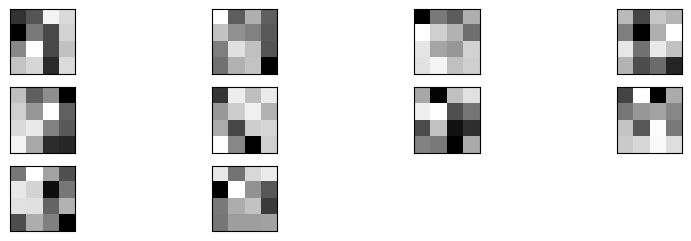

In [ ]:
# print the chosen filters
from matplotlib import pyplot

filters, biases = model.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 10, 1
plt.figure(figsize=(10,10))
for i in range(0, n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = pyplot.subplot( n_filters, 4, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

##CNN Fashion Mnist - Challenge CI Strategos

Add your best result to the (link)

### Discussion
* What are the best results?
* Additional discussion here

The first improvement was the change of Adam for the optimizer, that rised the results of some points in percentual. In this configuration of the network, Dropout was necessary for reducing overfitting, while weight decay was not so effective. However overfitting still is a problem for this configuration. Branched networks (not reported here, using not the Sequential model) gave results similar to sequential models but still less effective than the model above.
Next step was adding batches that improved the results, 100 seemed to be the best with good compromise against overfitting.
50 epochs are several, but there is the function for early stop; initialization of weights is important under this aspect.